In [1]:
%load_ext autoreload
%autoreload 2

In [57]:
import numpy as np
import matplotlib.pyplot as plt

from helpers.data import load_synthetic_data, load_img_data, init_dict
from helpers.utils import show_dict, dict_sim, plot_curves
from helpers.train import train

# 1. Data

In [43]:
k0 = 4
A, X, Y = load_synthetic_data(k0=4)
print(f"{A.shape}, {X.shape}, {Y.shape}")

for i in range(X.shape[1]):
    assert np.nonzero(X[:, i])[0].shape[0] == k0

(30, 60), (60, 4000), (30, 4000)


(64, 121)


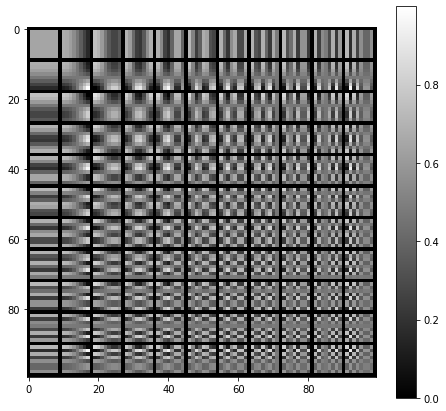

In [44]:
D = init_dict()
print(f"{D.shape}")
show_dict(D)

In [45]:
D_perm = np.random.permutation(D.T).T
D_perm[:, -1] = np.random.randn(D.shape[0])
dict_sim(D, D_perm)

1.0

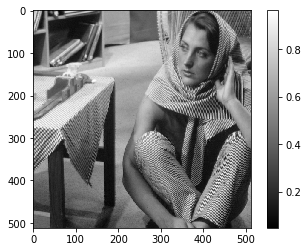

(64, 2000), (64, 1000)


In [87]:
img_path = "./imgs/barbara.png"
data_train, data_test = load_img_data(img_path, if_show=True)
print(f"{data_train.shape}, {data_test.shape}")

# 2. Training

## 2.1 Synthetic Data

Method: MOD
Current iteration: 0/1000
training error: 1.0937652674552476, test error: 1.0937652674552476
Current iteration: 10/1000
training error: 0.7058218099350329, test error: 0.7058218099350329
Current iteration: 20/1000
training error: 0.5130559102697628, test error: 0.5130559102697628
Current iteration: 30/1000
training error: 0.5072808891500509, test error: 0.5072808891500509
Current iteration: 40/1000
training error: 0.4908693078330134, test error: 0.4908693078330134
Current iteration: 50/1000
training error: 0.48580795358828804, test error: 0.48580795358828804


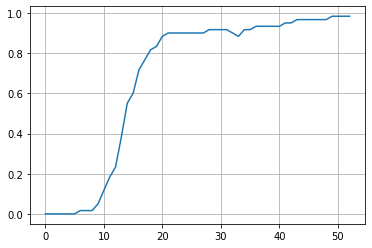

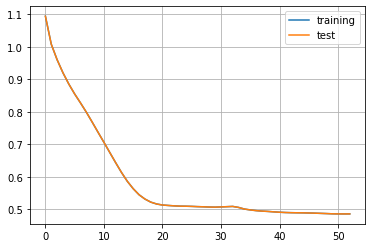

--------------------------------------------------
Method: K-SVD
Current iteration: 0/1000
training error: 1.1037255498961753, test error: 1.1037255498961753
Current iteration: 10/1000
training error: 0.6866913986477469, test error: 0.6866913986477469
Current iteration: 20/1000
training error: 0.5394883593944694, test error: 0.5394883593944694
Current iteration: 30/1000
training error: 0.5231799387062155, test error: 0.5231799387062155


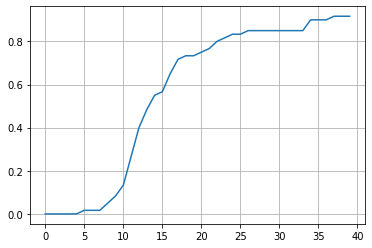

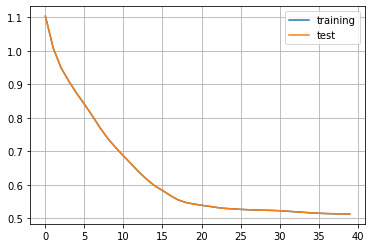

--------------------------------------------------


In [66]:
k0 = 4
A, X, Y = load_synthetic_data(k0=4)
A_init = np.random.randn(*A.shape)
A_init /= np.linalg.norm(A_init, axis=0)
out = []

for method in ["MOD", "K-SVD"]:
    print(f"Method: {method}")
    A_out, log_dict = train(A_init, Y, Y, k0=k0, method=method, A_ref=A)
    out.append((A_out, log_dict))
    plot_curves(log_dict)
    print("-" * 50)

In [68]:
out[0][1]["recovered_atoms_percent"][-1], out[1][1]["recovered_atoms_percent"][-1]

(0.9833333333333333, 0.9166666666666666)

## 2.2 Image Patches

Method: MOD
Current iteration: 0/150
training error: 0.23195273599953764, test error: 0.24242607959608717
Current iteration: 10/150
training error: 0.1910184182206241, test error: 0.22072353319238894
Current iteration: 20/150
training error: 0.18390364014222746, test error: 0.21256454673512631
Current iteration: 30/150
training error: 0.18111950472379323, test error: 0.2116577575862072
Current iteration: 40/150
training error: 0.18039205432373562, test error: 0.2118195833886491
Current iteration: 50/150
training error: 0.18003832202920092, test error: 0.21210264777030408
Current iteration: 60/150
training error: 0.18014259311392442, test error: 0.21146393129967408
Current iteration: 70/150
training error: 0.17983607988479625, test error: 0.21099965641161375
Current iteration: 80/150
training error: 0.17934018537480437, test error: 0.21056916285217556
Current iteration: 90/150
training error: 0.1792277870430624, test error: 0.2109565090250333


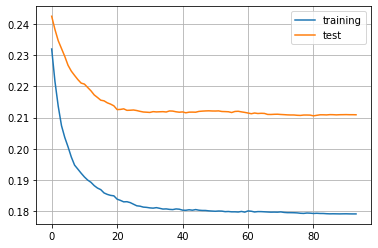

--------------------------------------------------
Method: K-SVD
Current iteration: 0/150
training error: 0.23388119401798968, test error: 0.24257570404884365
Current iteration: 10/150
training error: 0.19059145342639874, test error: 0.21884638373872092
Current iteration: 20/150
training error: 0.18493146175901545, test error: 0.2157942133241568
Current iteration: 30/150
training error: 0.1831051797003868, test error: 0.21570135726063105
Current iteration: 40/150
training error: 0.18186694339587733, test error: 0.21610091455913608
Current iteration: 50/150
training error: 0.1812578992634376, test error: 0.21398999374937575
Current iteration: 60/150
training error: 0.1808685819496975, test error: 0.21285486650478602
Current iteration: 70/150
training error: 0.1793949624372547, test error: 0.21251749865668637


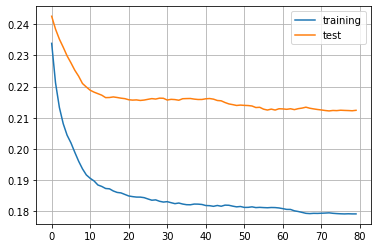

--------------------------------------------------


In [91]:
img_path = "./imgs/barbara.png"
k0 = 4
Y_train, Y_test = load_img_data(img_path)

A_init = init_dict()
out = []

for method in ["MOD", "K-SVD"]:
    print(f"Method: {method}")
    A_out, log_dict = train(A_init, Y_train, Y_test, k0=k0, method=method, stop_eps=1e-5)
    out.append((A_out, log_dict))
    plot_curves(log_dict)
    print("-" * 50)

In [96]:
A_MOD, A_K_SVD = out[0][0], out[1][0]
dict_sim(A_MOD, A_K_SVD)

0.01652892561983471

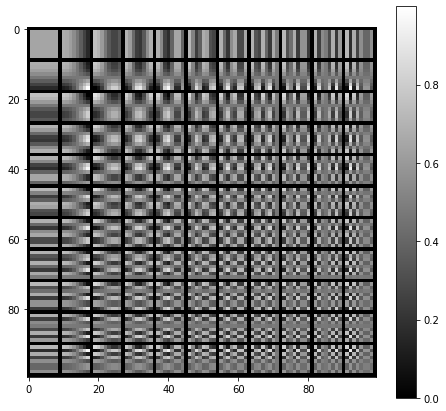

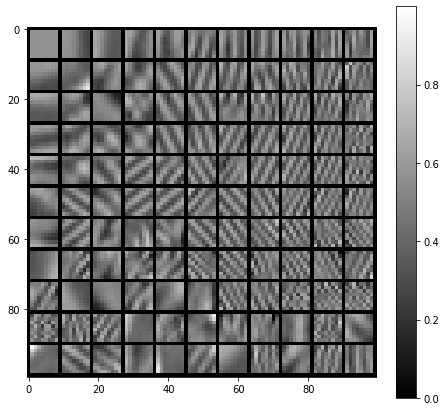

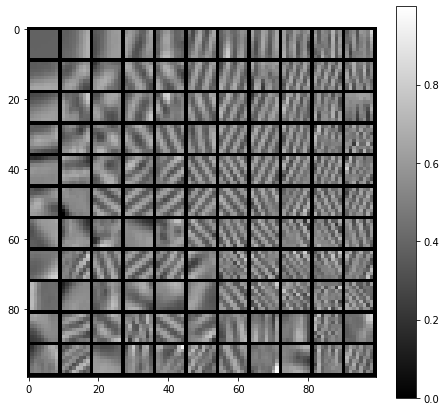

In [97]:
dicts = [A_init, A_MOD, A_K_SVD]
for A in dicts:
    show_dict(A)